<a href="https://colab.research.google.com/github/CarloGiorgio/carlogiorgio/blob/master/Magistrale/Computational%20Biophysics/ising_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ising Model
We try to simulate with a Montecarlo method a inhomogeneous Ising Model, with external field and try to solve the Inverse Ising problem

In [2]:
import numpy as np
import pandas as pd
import cupy as cp
import matplotlib.pyplot as plt

In [55]:
L=28 #lattice 
N=L*L #number of spins
T=2.7 #temperature
conf=cp.random.randint(0,2,(L,L))*2-1

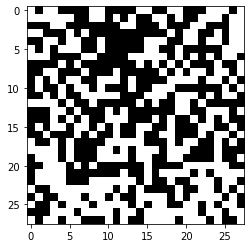

In [47]:
plt.imshow(cp.asnumpy(conf),cmap='binary')

In [59]:
conf=cp.reshape(conf,(N))
conf.shape

(784,)

In [49]:
h=cp.ones(N)/N #constant shape
J=cp.ones((N,N))
x=cp.linspace(0,28,28,)
xx,yy=cp.meshgrid(x,x)
xx=xx.reshape(-1)
yy=yy.reshape(-1)
xx,yy=cp.meshgrid(xx,yy)
J=1/(2*np.pi)**0.5*cp.exp(-(xx-yy)**2/2)/N/N #gaussian shape
J.shape

(784, 784)

In [60]:
def e(conf):
  return(-h.dot(conf)-0.5*conf.dot(J.dot(conf)))

def m(conf):
  return(cp.sum(conf)/N)

array(0.02283686)

In [61]:
te=100
e=np.zeros(te)
m=np.zeros(te)
for t in range (te):
  for i in range(N):
    k=cp.random.randint(N)
    conf_1=conf.copy()
    conf_1[k]=conf_1[k]*-1
    trye=cp.exp((e(conf_1)-e(conf))*-1/T)
    if trye>1 or (trye<1 and cp.random.rand()>trye):
      conf[k]=conf_1[k]
      print('im in')

TypeError: ignored